<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


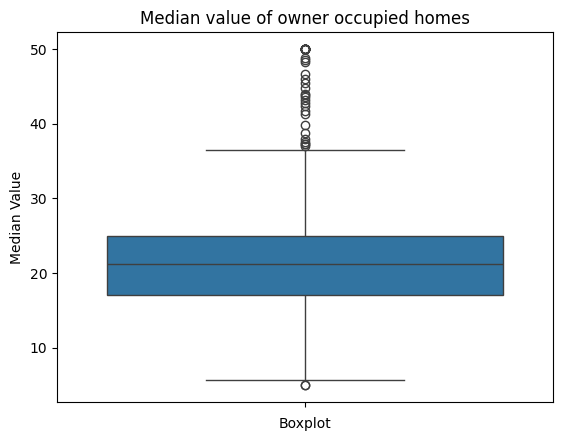

In [6]:
# box plot for median value of owner occupied homes
boxplot = sns.boxplot(y='MEDV',  data=boston_df)
boxplot.set(xlabel = "Boxplot"
           , ylabel = "Median Value"
           , title = "Median value of owner occupied homes")
pyplot.show()

The Boxplot shown here corresponds to Median value of owner-occupied homes in $1000's.
We can see that there are various outliers below the first quartile. 
The Median value from the plot can be seen as approximately 21 or 22.

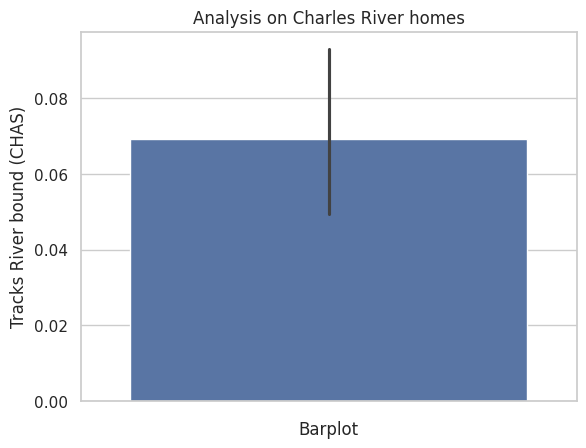

In [7]:
# bor plot for charles river 
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
ax.set_title('Analysis on Charles River homes')
ax.set_xlabel('Barplot')
ax.set_ylabel('Tracks River bound (CHAS)')
pyplot.show()

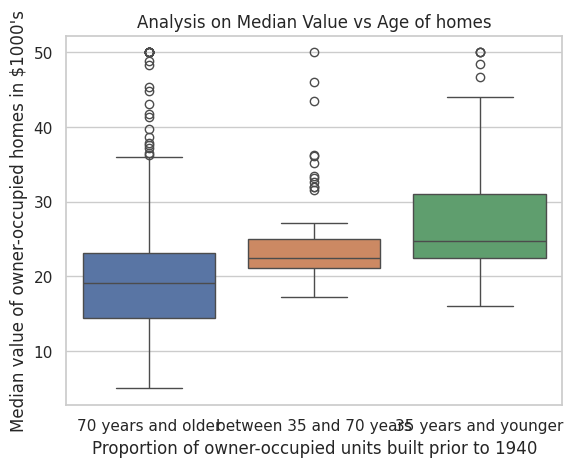

In [14]:
# box plot for charles river 
boston_df.loc[(boston_df['AGE'] <= 40), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 57), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_GROUP'] = '70 years and older'
boxplot = sns.boxplot(x="AGE_GROUP",y="MEDV", data=boston_df, hue='AGE_GROUP')
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Analysis on Median Value vs Age of homes")
pyplot.show()

The Boxplot corresponds to the various groups in the AGE column and there are three groups which are "<35 years", "Between 35 and 70" and ">70 years". The Median for the group "<35 years" is approximately 25, for ">70 years" the Median is approximately 19 and for "Between 35 and 70" group the Median is approximately 22.

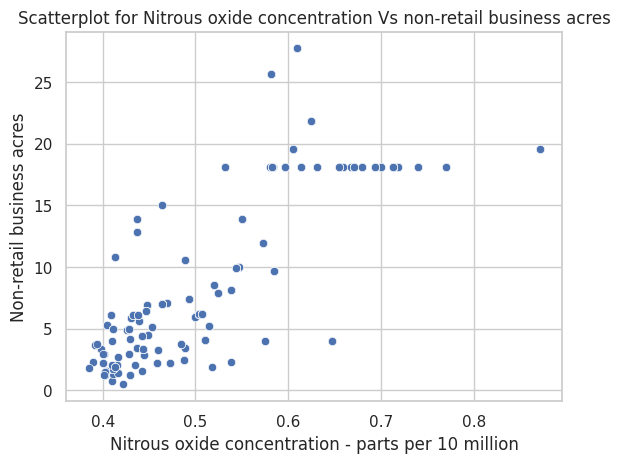

In [9]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Scatterplot for Nitrous oxide concentration Vs non-retail business acres')
ax.set_xlabel('Nitrous oxide concentration - parts per 10 million')
ax.set_ylabel('Non-retail business acres')
pyplot.show()
# analysis indicates when nitrous oxide level increases non-retail business acres also increase
# there is direct positive correlation

The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

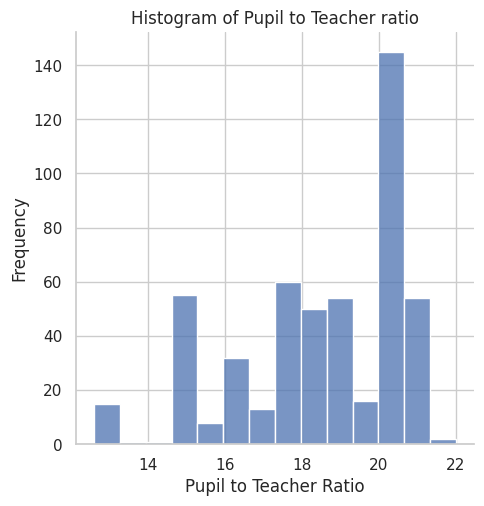

In [10]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.title('Histogram of Pupil to Teacher ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

The Histogram mentioned above corresponds to the Frequency Distribution of Pupil-Teacher ratio by town. The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution

Question 1:
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis & Test:     
H0:µ1=µ    2
  ("there is no difference in median value of houses bounded by the Charles river    ")
H1:µ1    ≠µ2
  ("there is a difference in median value of houses bounded by the Charles riv    er")
We can use the Levene's Test in Python to check test signif
    Then Use the ttest_ind from the scipy_stats library to test the hypothesis.
    Check p value and conclude.icance

In [11]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [12]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

Question 2:
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis & Test:
    First, we group the data into categories as the one-way ANOVA can't work with continuous variable.  -   
35 years and young      r
Between 35 and 70 ye      rs
70 years and o

    H0: µ1=µ2=µ3   (the three population means are equal)    
H 
 At least one of the means diff    er
Test for equality of variancelder

In [23]:
boston_df.loc[boston_df['AGE'] <= 30, 'AGE_GROUP'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = "70 and older"

In [24]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [26]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == "70 and older"]['MEDV']

In [27]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Question 3:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis & Test
    H0: 
  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.    
H :
 There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per to
    wn.

In [28]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Question 4:
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis & Test
    H0:β1  = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)    
H1:   1
 is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        16:53:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION: p-value is less than the alpha (α) level = 0.05. so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 
The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres .